In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
import pandas as pd

# Path to the JSONL file
file_path = "../data-v3/sessions.jsonl"

# Specify the chunk size
chunk_size = 100000

# Initialize an empty DataFrame
df = pd.DataFrame()

# Read and append chunks to the DataFrame
for chunk in pd.read_json(file_path, lines=True, chunksize=chunk_size):
    # print("a")
    df = pd.concat([df, chunk], ignore_index=True)

# Verify the resulting DataFrame
# print(df.info())


ValueError: Unmatched ''"' when when decoding 'string'

In [16]:
sessions = df

In [17]:
sessions['date'] = sessions['timestamp'].dt.date

In [18]:
sessions


,session_id,timestamp,user_id,track_id,event_type,date
0,124,2024-12-21 13:13:30.000,101,3xRcQ04b0l5RiU2w7lJhCD,play,2024-12-21
1,124,2024-12-21 13:16:23.613,101,3xRcQ04b0l5RiU2w7lJhCD,like,2024-12-21
2,124,2024-12-21 13:17:20.920,101,1ZycJRpLOazlLcoFGxGROO,play,2024-12-21
3,125,2024-11-16 05:48:57.640,101,1Tf0qifzTHdDC9RnTW9Di3,play,2024-11-16
4,125,2024-11-16 05:50:37.178,101,1Tf0qifzTHdDC9RnTW9Di3,like,2024-11-16
...,...,...,...,...,...,...
25299995,1794422,2024-08-03 02:51:43.093,17566,1HmzAZUvhQLhLo2z3ocpZI,play,2024-08-03
25299996,1794422,2024-08-03 02:57:36.320,17566,3QjQp2bfAvLTCSi8Zhzqis,play,2024-08-03
25299997,1794422,2024-08-03 02:59:14.677,17566,3QjQp2bfAvLTCSi8Zhzqis,like,2024-08-03
25299998,1794422,2024-08-03 03:00:11.387,17566,68osIGtVjM7QWVe6pazLHj,play,2024-08-03


In [19]:
filtered_sessions = sessions.dropna(subset = ['track_id'])
filtered_sessions

,session_id,timestamp,user_id,track_id,event_type,date
0,124,2024-12-21 13:13:30.000,101,3xRcQ04b0l5RiU2w7lJhCD,play,2024-12-21
1,124,2024-12-21 13:16:23.613,101,3xRcQ04b0l5RiU2w7lJhCD,like,2024-12-21
2,124,2024-12-21 13:17:20.920,101,1ZycJRpLOazlLcoFGxGROO,play,2024-12-21
3,125,2024-11-16 05:48:57.640,101,1Tf0qifzTHdDC9RnTW9Di3,play,2024-11-16
4,125,2024-11-16 05:50:37.178,101,1Tf0qifzTHdDC9RnTW9Di3,like,2024-11-16
...,...,...,...,...,...,...
25299995,1794422,2024-08-03 02:51:43.093,17566,1HmzAZUvhQLhLo2z3ocpZI,play,2024-08-03
25299996,1794422,2024-08-03 02:57:36.320,17566,3QjQp2bfAvLTCSi8Zhzqis,play,2024-08-03
25299997,1794422,2024-08-03 02:59:14.677,17566,3QjQp2bfAvLTCSi8Zhzqis,like,2024-08-03
25299998,1794422,2024-08-03 03:00:11.387,17566,68osIGtVjM7QWVe6pazLHj,play,2024-08-03


In [20]:
events_data_df = pd.DataFrame()


In [21]:
events_data_df["event_type"] = filtered_sessions['event_type']
events_data_df['track_id'] = filtered_sessions['track_id']
events_data_df["timestamp"] = filtered_sessions["timestamp"]

In [22]:
events_data_df

,event_type,track_id,timestamp
0,play,3xRcQ04b0l5RiU2w7lJhCD,2024-12-21 13:13:30.000
1,like,3xRcQ04b0l5RiU2w7lJhCD,2024-12-21 13:16:23.613
2,play,1ZycJRpLOazlLcoFGxGROO,2024-12-21 13:17:20.920
3,play,1Tf0qifzTHdDC9RnTW9Di3,2024-11-16 05:48:57.640
4,like,1Tf0qifzTHdDC9RnTW9Di3,2024-11-16 05:50:37.178
...,...,...,...
25299995,play,1HmzAZUvhQLhLo2z3ocpZI,2024-08-03 02:51:43.093
25299996,play,3QjQp2bfAvLTCSi8Zhzqis,2024-08-03 02:57:36.320
25299997,like,3QjQp2bfAvLTCSi8Zhzqis,2024-08-03 02:59:14.677
25299998,play,68osIGtVjM7QWVe6pazLHj,2024-08-03 03:00:11.387


In [23]:
events_data_df['timestamp'] = pd.to_datetime(events_data_df['timestamp'])
start_date = events_data_df['timestamp'].min()
events_data_df['week_number'] = ((events_data_df['timestamp'] - start_date).dt.days // 7) + 1
events_data_df['week_range'] = events_data_df['week_number'].apply(
    lambda x: f"week {x} {start_date + pd.Timedelta(weeks=x-1):%Y-%m-%d} - {start_date + pd.Timedelta(weeks=x):%Y-%m-%d}"
)
events_data_df


,event_type,track_id,timestamp,week_number,week_range
0,play,3xRcQ04b0l5RiU2w7lJhCD,2024-12-21 13:13:30.000,49,week 49 2024-12-15 - 2024-12-22
1,like,3xRcQ04b0l5RiU2w7lJhCD,2024-12-21 13:16:23.613,49,week 49 2024-12-15 - 2024-12-22
2,play,1ZycJRpLOazlLcoFGxGROO,2024-12-21 13:17:20.920,49,week 49 2024-12-15 - 2024-12-22
3,play,1Tf0qifzTHdDC9RnTW9Di3,2024-11-16 05:48:57.640,44,week 44 2024-11-10 - 2024-11-17
4,like,1Tf0qifzTHdDC9RnTW9Di3,2024-11-16 05:50:37.178,44,week 44 2024-11-10 - 2024-11-17
...,...,...,...,...,...
25299995,play,1HmzAZUvhQLhLo2z3ocpZI,2024-08-03 02:51:43.093,29,week 29 2024-07-28 - 2024-08-04
25299996,play,3QjQp2bfAvLTCSi8Zhzqis,2024-08-03 02:57:36.320,29,week 29 2024-07-28 - 2024-08-04
25299997,like,3QjQp2bfAvLTCSi8Zhzqis,2024-08-03 02:59:14.677,29,week 29 2024-07-28 - 2024-08-04
25299998,play,68osIGtVjM7QWVe6pazLHj,2024-08-03 03:00:11.387,29,week 29 2024-07-28 - 2024-08-04


In [24]:
events_data_df

,event_type,track_id,timestamp,week_number,week_range
0,play,3xRcQ04b0l5RiU2w7lJhCD,2024-12-21 13:13:30.000,49,week 49 2024-12-15 - 2024-12-22
1,like,3xRcQ04b0l5RiU2w7lJhCD,2024-12-21 13:16:23.613,49,week 49 2024-12-15 - 2024-12-22
2,play,1ZycJRpLOazlLcoFGxGROO,2024-12-21 13:17:20.920,49,week 49 2024-12-15 - 2024-12-22
3,play,1Tf0qifzTHdDC9RnTW9Di3,2024-11-16 05:48:57.640,44,week 44 2024-11-10 - 2024-11-17
4,like,1Tf0qifzTHdDC9RnTW9Di3,2024-11-16 05:50:37.178,44,week 44 2024-11-10 - 2024-11-17
...,...,...,...,...,...
25299995,play,1HmzAZUvhQLhLo2z3ocpZI,2024-08-03 02:51:43.093,29,week 29 2024-07-28 - 2024-08-04
25299996,play,3QjQp2bfAvLTCSi8Zhzqis,2024-08-03 02:57:36.320,29,week 29 2024-07-28 - 2024-08-04
25299997,like,3QjQp2bfAvLTCSi8Zhzqis,2024-08-03 02:59:14.677,29,week 29 2024-07-28 - 2024-08-04
25299998,play,68osIGtVjM7QWVe6pazLHj,2024-08-03 03:00:11.387,29,week 29 2024-07-28 - 2024-08-04


In [25]:
event_counts = events_data_df.groupby(['track_id', 'event_type', 'week_number']).size().unstack(level='event_type', fill_value=0)    .reset_index()
event_counts

event_type,track_id,week_number,like,play,skip
0,003FTlCpBTM4eSqYSWPv4H,1,18,25,2
1,003FTlCpBTM4eSqYSWPv4H,2,16,26,4
2,003FTlCpBTM4eSqYSWPv4H,3,10,17,3
3,003FTlCpBTM4eSqYSWPv4H,4,14,20,4
4,003FTlCpBTM4eSqYSWPv4H,5,12,16,0
...,...,...,...,...,...
649334,7zzoxJbgjme3366mOp5UnH,49,8,10,0
649335,7zzoxJbgjme3366mOp5UnH,50,14,17,1
649336,7zzoxJbgjme3366mOp5UnH,51,6,7,2
649337,7zzoxJbgjme3366mOp5UnH,52,12,17,3


In [26]:
max_week = max(event_counts['week_number'])

In [27]:
all_weeks = pd.DataFrame(
    [(track_id, week) for track_id in event_counts['track_id'].unique() for week in range(1, max_week+1)],
    columns=['track_id', 'week_number']
)


In [28]:
all_weeks

,track_id,week_number
0,003FTlCpBTM4eSqYSWPv4H,1
1,003FTlCpBTM4eSqYSWPv4H,2
2,003FTlCpBTM4eSqYSWPv4H,3
3,003FTlCpBTM4eSqYSWPv4H,4
4,003FTlCpBTM4eSqYSWPv4H,5
...,...,...
652054,7zzoxJbgjme3366mOp5UnH,49
652055,7zzoxJbgjme3366mOp5UnH,50
652056,7zzoxJbgjme3366mOp5UnH,51
652057,7zzoxJbgjme3366mOp5UnH,52


In [29]:
event_counts.sort_values(by='play')


event_type,track_id,week_number,like,play,skip
153883,1mhVXWduD8ReDwusfaHNwU,53,1,0,1
275175,3CD75JGmSMKA3RW5RtOwAz,53,0,0,1
220871,2YolSRrYvFxhTGjbiT33yH,53,0,0,1
248063,2sFU5bR4Nsk0SWtZZIc36r,53,0,0,1
649338,7zzoxJbgjme3366mOp5UnH,53,1,1,0
...,...,...,...,...,...
172735,20McUFi8KCIVdNDLrkTDuZ,50,222,811,50
498991,5uCax9HTNlzGybIStD3vDh,5,201,815,63
307195,3aQem4jVGdhtg116TmJnHz,47,222,817,59
320774,3jjujdWJ72nww5eGnfs2E7,52,244,820,45


In [30]:
event_counts_complete = pd.merge(
    all_weeks,
    event_counts,
    on=['track_id', 'week_number'],
    how='left'
)


In [31]:
event_counts_complete

,track_id,week_number,like,play,skip
0,003FTlCpBTM4eSqYSWPv4H,1,18.0,25.0,2.0
1,003FTlCpBTM4eSqYSWPv4H,2,16.0,26.0,4.0
2,003FTlCpBTM4eSqYSWPv4H,3,10.0,17.0,3.0
3,003FTlCpBTM4eSqYSWPv4H,4,14.0,20.0,4.0
4,003FTlCpBTM4eSqYSWPv4H,5,12.0,16.0,0.0
...,...,...,...,...,...
652054,7zzoxJbgjme3366mOp5UnH,49,8.0,10.0,0.0
652055,7zzoxJbgjme3366mOp5UnH,50,14.0,17.0,1.0
652056,7zzoxJbgjme3366mOp5UnH,51,6.0,7.0,2.0
652057,7zzoxJbgjme3366mOp5UnH,52,12.0,17.0,3.0


In [32]:
event_counts_complete.fillna(0, inplace=True)

In [33]:
event_counts_complete


,track_id,week_number,like,play,skip
0,003FTlCpBTM4eSqYSWPv4H,1,18.0,25.0,2.0
1,003FTlCpBTM4eSqYSWPv4H,2,16.0,26.0,4.0
2,003FTlCpBTM4eSqYSWPv4H,3,10.0,17.0,3.0
3,003FTlCpBTM4eSqYSWPv4H,4,14.0,20.0,4.0
4,003FTlCpBTM4eSqYSWPv4H,5,12.0,16.0,0.0
...,...,...,...,...,...
652054,7zzoxJbgjme3366mOp5UnH,49,8.0,10.0,0.0
652055,7zzoxJbgjme3366mOp5UnH,50,14.0,17.0,1.0
652056,7zzoxJbgjme3366mOp5UnH,51,6.0,7.0,2.0
652057,7zzoxJbgjme3366mOp5UnH,52,12.0,17.0,3.0


In [34]:
for col in event_counts.columns[2:]:
    event_counts_complete[col] = event_counts_complete[col].astype(int)

In [36]:
event_counts_complete

,track_id,week_number,like,play,skip
0,003FTlCpBTM4eSqYSWPv4H,1,18,25,2
1,003FTlCpBTM4eSqYSWPv4H,2,16,26,4
2,003FTlCpBTM4eSqYSWPv4H,3,10,17,3
3,003FTlCpBTM4eSqYSWPv4H,4,14,20,4
4,003FTlCpBTM4eSqYSWPv4H,5,12,16,0
...,...,...,...,...,...
652054,7zzoxJbgjme3366mOp5UnH,49,8,10,0
652055,7zzoxJbgjme3366mOp5UnH,50,14,17,1
652056,7zzoxJbgjme3366mOp5UnH,51,6,7,2
652057,7zzoxJbgjme3366mOp5UnH,52,12,17,3


In [37]:
event_counts = events_data_df.groupby(['track_id', 'event_type', 'week_number']).size().unstack(level='event_type', fill_value=0)    .reset_index()
event_counts

event_type,track_id,week_number,like,play,skip
0,003FTlCpBTM4eSqYSWPv4H,1,18,25,2
1,003FTlCpBTM4eSqYSWPv4H,2,16,26,4
2,003FTlCpBTM4eSqYSWPv4H,3,10,17,3
3,003FTlCpBTM4eSqYSWPv4H,4,14,20,4
4,003FTlCpBTM4eSqYSWPv4H,5,12,16,0
...,...,...,...,...,...
649334,7zzoxJbgjme3366mOp5UnH,49,8,10,0
649335,7zzoxJbgjme3366mOp5UnH,50,14,17,1
649336,7zzoxJbgjme3366mOp5UnH,51,6,7,2
649337,7zzoxJbgjme3366mOp5UnH,52,12,17,3


In [46]:
event_counts["track_id"].nunique()

12303

In [43]:
event_counts = event_counts.rename(columns={'play': 'play_count', 'like': 'like_count', 'skip': 'skip_count'})
events_data_df = events_data_df.merge(event_counts, on='track_id', how='inner')
events_data_df = events_data_df.fillna(0)
events_data_df.drop("event_type", axis=1, inplace=True)

: 

In [27]:
events_data_df

,track_id,timestamp,week_number_x,week_range,week_number_y,like_count,play_count,skip_count
0,4YPgTCGJWAlHQ5g6eWoM8r,2024-07-13 15:55:37.000,33,week 33 2024-07-10 - 2024-07-17,7,0,1,0
1,4YPgTCGJWAlHQ5g6eWoM8r,2024-07-13 15:55:37.000,33,week 33 2024-07-10 - 2024-07-17,33,0,1,0
2,4p8QcNkaq2FQj8uGJ7HEDK,2024-06-20 06:31:23.547,30,week 30 2024-06-19 - 2024-06-26,1,0,1,0
3,4p8QcNkaq2FQj8uGJ7HEDK,2024-06-20 06:31:23.547,30,week 30 2024-06-19 - 2024-06-26,15,1,1,1
4,4p8QcNkaq2FQj8uGJ7HEDK,2024-06-20 06:31:23.547,30,week 30 2024-06-19 - 2024-06-26,30,0,1,0
...,...,...,...,...,...,...,...,...
36654,4COFVKhvXA3LecFReH6D2v,2024-08-11 13:42:19.523,37,week 37 2024-08-07 - 2024-08-14,12,0,1,0
36655,4COFVKhvXA3LecFReH6D2v,2024-08-11 13:42:19.523,37,week 37 2024-08-07 - 2024-08-14,37,1,1,0
36656,6vPAmoERUMRoTZaCCSWQ12,2024-08-11 13:44:50.582,37,week 37 2024-08-07 - 2024-08-14,37,0,1,0
36657,5A32KQZznC2HSqr9qzTl2N,2024-08-11 13:49:36.582,37,week 37 2024-08-07 - 2024-08-14,37,0,1,0


In [28]:
events_data_df=events_data_df.groupby(['track_id', 'week_range'])[['like_count', 'play_count', 'skip_count']].sum().reset_index()

In [38]:
event_counts

event_type,track_id,week_number,like,play,skip
0,003FTlCpBTM4eSqYSWPv4H,1,18,25,2
1,003FTlCpBTM4eSqYSWPv4H,2,16,26,4
2,003FTlCpBTM4eSqYSWPv4H,3,10,17,3
3,003FTlCpBTM4eSqYSWPv4H,4,14,20,4
4,003FTlCpBTM4eSqYSWPv4H,5,12,16,0
...,...,...,...,...,...
649334,7zzoxJbgjme3366mOp5UnH,49,8,10,0
649335,7zzoxJbgjme3366mOp5UnH,50,14,17,1
649336,7zzoxJbgjme3366mOp5UnH,51,6,7,2
649337,7zzoxJbgjme3366mOp5UnH,52,12,17,3


In [ ]:
import torch
from torch.utils.data import Dataset
import torch.nn.functional as F
import numpy as np

class SongEventDataset(Dataset):
    def __init__(self, tracks_artists, event_counts, max_genres=12, num_keys=12, split="train", test_size=0.1, val_size=0.1):
        """
        Args:
            tracks_artists (pd.DataFrame): DataFrame with song and artist data (including genres and key).
            event_counts (pd.DataFrame): DataFrame with event data (plays, likes, skips).
            max_genres (int): Maximum number of genres for padding.
            num_keys (int): Number of unique keys for one-hot encoding.
            split (str): Split type ("train", "val", or "test").
            test_size (float): Proportion of data for testing (after splitting by time).
            val_size (float): Proportion of data for validation (after splitting by time).
        """
        self.tracks_artists = tracks_artists
        self.event_counts = event_counts
        self.max_genres = max_genres
        self.num_keys = num_keys
        self.split = split
        self.test_size = test_size
        self.val_size = val_size

        self.tracks_dict = tracks_artists.set_index('id_x').to_dict(orient='index')

        prev_id = event_counts["track_id"][0]
        self.n_weeks = 0
        for index, row in event_counts.iterrows():
            if(row["track_id"] != prev_id):
                break
            self.n_weeks += 1
        print(self.n_weeks)

        self.train_end = int((1 - self.test_size - self.val_size) * self.n_weeks)
        self.val_end = int((1 - self.test_size) * self.n_weeks)

        self.n_train = self.train_end
        self.n_val = self.val_end - self.train_end
        self.n_test = self.n_weeks - self.val_end

    def __len__(self):
        return len(self.event_counts)

    def __getitem__(self, idx):
        if self.split == "train":
            song_idx = idx // self.n_train
            week_idx = idx % self.n_train
            idx = song_idx * self.n_weeks + week_idx
        elif self.split == "val":
            song_idx = idx // self.n_val
            week_idx = idx % self.n_val
            idx = song_idx * self.n_weeks + self.train_end + week_idx
        elif self.split == "test":
            song_idx = idx // self.n_test
            week_idx = idx % self.n_test
            idx = song_idx * self.n_weeks + self.val_end + week_idx
        # Get the song_id and week_number for the given index
        song_id = self.event_counts.iloc[idx]['track_id']
        week_number = self.event_counts.iloc[idx]['week_number']

        # Fetch event features (plays, likes, skips) for this song_id and week_number
        event_features = torch.tensor([self.event_counts.iloc[idx]['play'],
                                       self.event_counts.iloc[idx]['like'],
                                       self.event_counts.iloc[idx]['skip']], dtype=torch.float)

        # Fetch the key for this song_id and perform one-hot encoding
        key = self.tracks_dict[song_id]['key']
        key_one_hot = F.one_hot(torch.tensor(key, dtype=torch.long), self.num_keys).float()

        # Fetch genres for this song_id
        genres = self.tracks_dict[song_id]['genre_indices']  # Assuming genre_indices is a list of genre indices
        padded_genres = genres[:self.max_genres] + [-1] * (self.max_genres - len(genres))  # Pad to max_genres
        genre_tensor = torch.tensor(padded_genres, dtype=torch.long)

        # Return the data (event_features, key_one_hot, genre_tensor)
        return event_features, key_one_hot, genre_tensor

# Example usage:
# Assuming `tracks_artists` and `event_counts` are already loaded as DataFrames
# tracks_artists = pd.read_csv('tracks_artists.csv')
# event_counts = pd.read_csv('event_counts.csv')

# Create the dataset for training split
train_dataset = SongEventDataset(tracks_artists, event_counts_complete, split="train")

# Create the dataset for validation split
val_dataset = SongEventDataset(tracks_artists, event_counts_complete, split="val")

# Create the dataset for test split
test_dataset = SongEventDataset(tracks_artists, event_counts_complete, split="test")

# Access a sample from the train set
event_features, key_one_hot, genre_tensor = train_dataset[0]

print("Event Features:", event_features)
print("Key One-Hot Encoding:", key_one_hot)
print("Genre Tensor:", genre_tensor)

In [55]:
import pandas as pd
import numpy as np

class DatasetSplitter:
    def __init__(self, event_counts, train_size=0.8, val_size=0.1, test_size=0.1):
        self.event_counts = event_counts
        self.train_size = train_size
        self.val_size = val_size
        self.test_size = test_size
        self.n_weeks = 0
        prev_id = event_counts["track_id"][0]
        for index, row in event_counts.iterrows():
            if(row["track_id"] != prev_id):
                break
            self.n_weeks += 1
        self.n_train = int(len(event_counts) * train_size)
        self.n_val = int(len(event_counts) * val_size)
        self.n_test = len(event_counts) - self.n_train - self.n_val
        self.train_end = self.n_train
        self.val_end = self.train_end + self.n_val

    # def split(self, split_type, idx):
    #     if split_type == "train":
    #         song_idx = idx // self.n_train
    #         week_idx = idx % self.n_train
    #         idx = song_idx * self.n_weeks + week_idx
    #     elif split_type == "val":
    #         song_idx = idx // self.n_val
    #         week_idx = idx % self.n_val
    #         idx = song_idx * self.n_weeks + self.train_end + week_idx
    #     elif split_type == "test":
    #         song_idx = idx // self.n_test
    #         week_idx = idx % self.n_test
    #         idx = song_idx * self.n_weeks + self.val_end + week_idx
    #     return idx
    # 
    # def create_splits(self):
    #     train_set = []
    #     val_set = []
    #     test_set = []
    # 
    #     # Iterate over the entire dataset and split sequentially
    #     for idx in range(len(self.event_counts)):
    #             train_set.append(self.split("train", idx))
    #             val_set.append(self.split("val", idx))
    #             test_set.append(self.split("test", idx))
    #     print(max(train_set))
    #     print(min(train_set))
    #     print(max(val_set))
    #     print(min(val_set))
    #     print(max(test_set))
    #     print(min(test_set))
    #     
    #     train_df = self.event_counts.iloc[train_set]
    #     val_df = self.event_counts.iloc[val_set]
    #     test_df = self.event_counts.iloc[test_set]
    # 
    #     return train_df, val_df, test_df

splitter = DatasetSplitter(event_counts)
train_df, val_df, test_df = splitter.create_splits()



519470
0
584880
519471
649804
584404


IndexError: positional indexers are out-of-bounds

In [58]:
import pandas as pd
import numpy as np

class DatasetSplitter:
    def __init__(self, event_counts, n_weeks=53, train_size=0.8, val_size=0.1, test_size=0.1):
        self.event_counts = event_counts
        self.n_weeks = n_weeks  # Number of weeks per song
        self.train_size = train_size
        self.val_size = val_size
        self.test_size = test_size

        # Calculate how many weeks go into train, val, test splits
        self.n_train = int(self.n_weeks * self.train_size)
        self.n_val = int(self.n_weeks * self.val_size)
        self.n_test = self.n_weeks - self.n_train - self.n_val

    def split(self, split_type, song_id):
        # Get the week number for this song_id
        song_data = self.event_counts[self.event_counts['track_id'] == song_id]
        week_numbers = song_data['week_number'].unique()

        # Split the weeks based on the split type
        if split_type == "train":
            week_range = range(self.n_train)
        elif split_type == "val":
            week_range = range(self.n_train, self.n_train + self.n_val)
        elif split_type == "test":
            week_range = range(self.n_train + self.n_val, self.n_weeks)

        # Filter and return indices based on the selected weeks for this song
        return song_data[song_data['week_number'].isin(week_range)].index.tolist()

    def create_splits(self):
        train_set = []
        val_set = []
        test_set = []

        # Get unique song_ids
        song_ids = self.event_counts['track_id'].unique()

        # Iterate over all songs and split based on the week numbers
        for song_id in song_ids:
            i+=1
            train_set.extend(self.split("train", song_id))
            val_set.extend(self.split("val", song_id))
            test_set.extend(self.split("test", song_id))

        # Create DataFrames for each split
        train_df = self.event_counts.loc[train_set]
        val_df = self.event_counts.loc[val_set]
        test_df = self.event_counts.loc[test_set]

        return train_df, val_df, test_df

# Example usage:
# Assuming `event_counts` is already loaded as a DataFrame with columns 'track_id' and 'week_number'
# event_counts = pd.read_csv('event_counts.csv')

splitter = DatasetSplitter(event_counts)

train_df, val_df, test_df = splitter.create_splits()

print("Training Set Size:", len(train_df))
print("Validation Set Size:", len(val_df))
print("Test Set Size:", len(test_df))

003FTlCpBTM4eSqYSWPv4H
1
003vvx7Niy0yvhvHt4a68B
2
005Dlt8Xaz3DkaXiRJgdiS
3
005lwxGU1tms6HGELIcUv9
4
009ImBOrIUlWgla8U05RAC
5
00Amd2EiGo17YoZyOjk3VV
6
00BHe2yBtdOzhKPmI7rpTE
7
00Ec4qjKRWzwidhmCLqEPd
8
00FROhC5g4iJdax5US8jRr
9
00GOPLxW4PGQuUYdPJh8K1
10
00GbPd84bEyYS477RSymJW
11
00Hlym039AB1cZPzgJVi5s
12
00IrSynHsun7DpDrLkRIjM
13
00Mb3DuaIH1kjrwOku9CGU
14
00NAQYOP4AmWR549nnYJZu
15
00NUqFMIpCsrYPbM9YpVHQ
16
00U0pedRUMEzREpyRqbVT6
17
00WvmRXTkPBZNhhRK3xfdy
18
00cBcYOlnHoXX9ver3cmdE
19
00cxhG668jV6gU6VK2FUVI
20
00gAVWgRJy92PCAHFzVu83
21
00kIWJu9IHiQ6i0qJAU0Z9
22
00oZhqZIQfL9P5CjOP6JsO
23
00qOE7OjRl0BpYiCiweZB2
24
00t7QTffOR3SA3L1BvSQVq
25
017PF4Q3l4DBUiWoXk4OWT
26
018Idkvf82hi44UZmIXiGB
27
01Aj44KIjCrPmZeXq4UOky
28
01BC4Xj5tfsfV8DLDrma7q
29
01BlGnXpLuC0BjgUxVYZFb
30
01Ch5LzVStxCFPKkT1xg6k
31
01JYvQ6udfhUw9Jed9EzoK
32
01Lr5YepbgjXAWR9iOEyH1
33
01MBhRpvFkbeRwAp7gcF2W
34
01PnRJeFSeOgIpBuv1kQKd
35
01QdEx6kFr78ZejhQtWR5m
36
01QwobyKNu7WRCVuTQbRDN
37
01SfTM5nfCou5gQL70r6gs
38
01VFDkHBNJcCNUjzD3flW

KeyboardInterrupt: 

In [59]:
import pandas as pd
import numpy as np

class DatasetSplitter:
    def __init__(self, event_counts, n_weeks=53, train_size=0.8, val_size=0.1, test_size=0.1):
        self.event_counts = event_counts
        self.n_weeks = n_weeks  # Number of weeks per song
        self.train_size = train_size
        self.val_size = val_size
        self.test_size = test_size

        # Calculate how many weeks go into train, val, test splits
        self.n_train = int(self.n_weeks * self.train_size)
        self.n_val = int(self.n_weeks * self.val_size)
        self.n_test = self.n_weeks - self.n_train - self.n_val

    def create_splits(self):
        # Create a mapping for each track_id to its week number range for train, val, test
        train_mask = (self.event_counts['week_number'] < self.n_train)
        val_mask = (self.event_counts['week_number'] >= self.n_train) & (self.event_counts['week_number'] < self.n_train + self.n_val)
        test_mask = (self.event_counts['week_number'] >= self.n_train + self.n_val)

        # Apply masks directly to split data
        train_df = self.event_counts[train_mask]
        val_df = self.event_counts[val_mask]
        test_df = self.event_counts[test_mask]

        return train_df, val_df, test_df

# Example usage:
# Assuming `event_counts` is already loaded as a DataFrame with columns 'track_id' and 'week_number'
# event_counts = pd.read_csv('event_counts.csv')

splitter = DatasetSplitter(event_counts)

train_df, val_df, test_df = splitter.create_splits()

print("Training Set Size:", len(train_df))
print("Validation Set Size:", len(val_df))
print("Test Set Size:", len(test_df))

Training Set Size: 503895
Validation Set Size: 61455
Test Set Size: 83989


In [60]:
train_df.nunique()

event_type
track_id       12303
week_number       41
like             143
play             251
skip              79
dtype: int64

In [69]:
val_df

event_type,track_id,week_number,like,play,skip
41,003FTlCpBTM4eSqYSWPv4H,42,9,11,0
42,003FTlCpBTM4eSqYSWPv4H,43,11,16,3
43,003FTlCpBTM4eSqYSWPv4H,44,14,26,4
44,003FTlCpBTM4eSqYSWPv4H,45,12,20,4
45,003FTlCpBTM4eSqYSWPv4H,46,12,21,6
...,...,...,...,...,...
649327,7zzoxJbgjme3366mOp5UnH,42,9,12,2
649328,7zzoxJbgjme3366mOp5UnH,43,10,13,4
649329,7zzoxJbgjme3366mOp5UnH,44,3,6,2
649330,7zzoxJbgjme3366mOp5UnH,45,9,16,3


In [70]:
test_df

event_type,track_id,week_number,like,play,skip
46,003FTlCpBTM4eSqYSWPv4H,47,16,20,3
47,003FTlCpBTM4eSqYSWPv4H,48,15,23,2
48,003FTlCpBTM4eSqYSWPv4H,49,19,25,4
49,003FTlCpBTM4eSqYSWPv4H,50,21,30,5
50,003FTlCpBTM4eSqYSWPv4H,51,21,29,5
...,...,...,...,...,...
649334,7zzoxJbgjme3366mOp5UnH,49,8,10,0
649335,7zzoxJbgjme3366mOp5UnH,50,14,17,1
649336,7zzoxJbgjme3366mOp5UnH,51,6,7,2
649337,7zzoxJbgjme3366mOp5UnH,52,12,17,3


In [62]:
val_df.nunique()

event_type
track_id       12303
week_number        5
like             117
play             190
skip              73
dtype: int64

In [42]:
train_df

event_type,track_id,week_number,like,play,skip
0,003FTlCpBTM4eSqYSWPv4H,1,18,25,2
1,003FTlCpBTM4eSqYSWPv4H,2,16,26,4
2,003FTlCpBTM4eSqYSWPv4H,3,10,17,3
3,003FTlCpBTM4eSqYSWPv4H,4,14,20,4
4,003FTlCpBTM4eSqYSWPv4H,5,12,16,0
...,...,...,...,...,...
519466,6AdLyvisRKHLAwARaZMGr6,46,11,12,3
519467,6AdLyvisRKHLAwARaZMGr6,47,11,17,5
519468,6AdLyvisRKHLAwARaZMGr6,48,23,28,4
519469,6AdLyvisRKHLAwARaZMGr6,49,21,28,4


In [63]:
train_df["track_id"].nunique()

12303

In [64]:
k = 2

Coefficients: [0.24033535 0.25974568 0.24961249 0.24931522]
Intercept: 0.029747886779802002
Validation RMSE: 5.319072922472047
Validation R-squared: 0.9930763774670118
Test RMSE: 33.43551462205232
Test R-squared: 0.6354112562837255


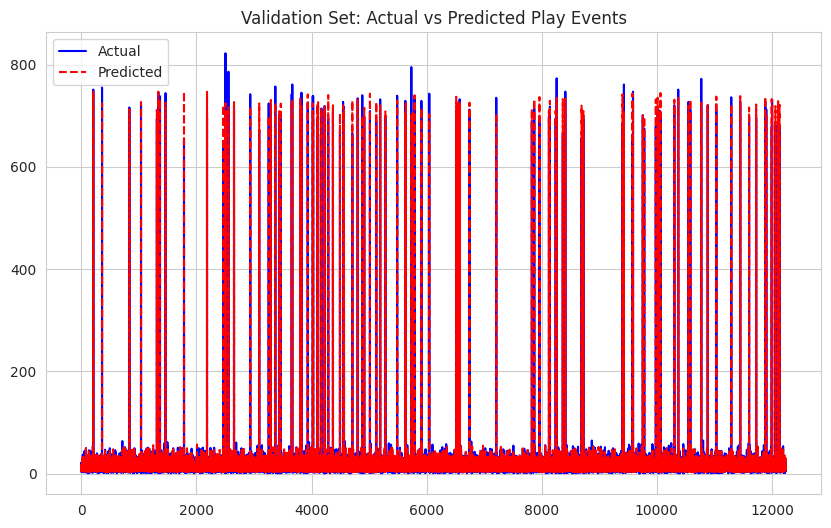

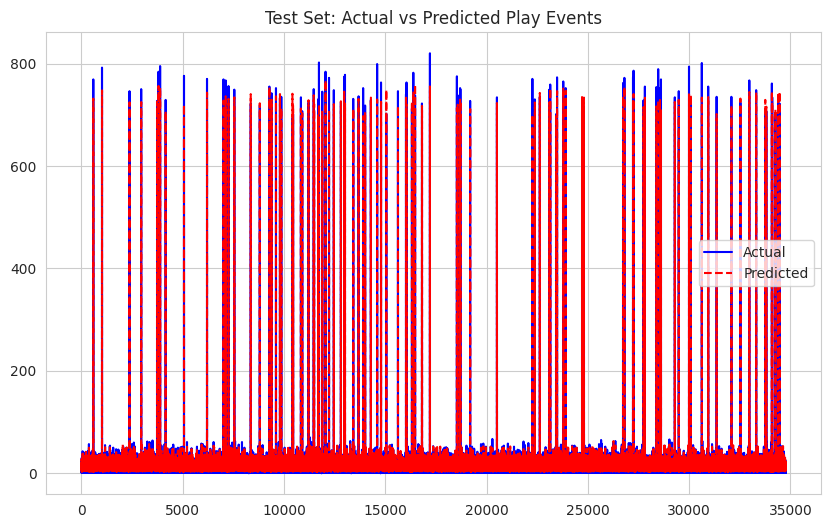

In [68]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming `train_df`, `val_df`, and `test_df` are already split datasets.

# Prepare features (previous 3 plays) and target (next day's play)
def create_features(event_counts, window=3):
    X = []
    y = []

    # Iterate over each track_id and prepare the sliding window for features
    for song_id in event_counts['track_id'].unique():
        song_data = event_counts[event_counts['track_id'] == song_id]

        for i in range(window, len(song_data)):
            # Get previous 'window' plays
            prev_plays = song_data.iloc[i-window:i]['play'].values
            X.append(prev_plays)

            # The target is the play value for the next day
            y.append(song_data.iloc[i]['play'])

    return np.array(X), np.array(y)

# Create features and target for train, val, test
X_train, y_train = create_features(train_df, window=4)
X_val, y_val = create_features(val_df, window=4)
X_test, y_test = create_features(test_df, window=4)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the validation and test sets
y_val_pred = model.predict(X_val)
y_val_ped
y_test_pred = model.predict(X_test)

# Metrics
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# Display coefficients and bias term
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation R-squared: {r2_val}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R-squared: {r2_test}")

# Plot the predictions vs actual for validation set
plt.figure(figsize=(10, 6))
plt.plot(y_val, label="Actual", color="blue")
plt.plot(y_val_pred, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("Validation Set: Actual vs Predicted Play Events")
plt.show()

# Plot the predictions vs actual for test set
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual", color="blue")
plt.plot(y_test_pred, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("Test Set: Actual vs Predicted Play Events")
plt.show()

In [71]:
y_val_pred

array([18.30559662, 14.79133511,  5.04594973, ...,  7.52143946,
       13.97358955, 11.77718431])

In [72]:
X_train

array([[25, 26, 17, 20],
       [26, 17, 20, 16],
       [17, 20, 16, 16],
       ...,
       [ 9, 17, 14, 12],
       [17, 14, 12,  8],
       [14, 12,  8, 13]])

In [73]:
def create_features(event_counts, window=3):
    X = []
    y = []

    # Iterate over each track_id and prepare the sliding window for features
    for song_id in event_counts['track_id'].unique():
        song_data = event_counts[event_counts['track_id'] == song_id]

        for i in range(window, len(song_data)):
            # Get previous 'window' plays
            prev_plays = song_data.iloc[i-window:i]['play'].values
            X.append(prev_plays)

            # The target is the play value for the next day
            y.append(song_data.iloc[i]['play'])

    return np.array(X), np.array(y)

In [74]:
X_train, y_train = create_features(train_df, window=4)
X_val, y_val = create_features(val_df, window=4)
X_test, y_test = create_features(test_df, window=4)

# Problem popularności i określenie jej znaczenia
W ramach realizacji mikroserwisu stworzone zostaną dwa endpointy. Podyktowane jest to problemem rozumienia popularności i jej zastosowania w aplikacji klienckiej. W podstawowym rozumieniu popularności utwory określane terminem _popularne_ charakteryzują się wysokim zainteresowaniem odbiorców, co przejawia się wysoką liczbą wyświetleń każdego z tych utworów. Prowadzić to może do sytuacji w której utwory cieszące się uznaniem wśród odbiorców pozostają na polecanych listach latami, co skutecznie blokuje nowe utwory. Podobną sytuację obrazuje efekt św. Mateusza, której znaczenie przedstawia poniższy fragment z serwisu Wikipedia.

 _Efekt św. Mateusza – ogólna zasada socjologiczna o ubożeniu osób biednych i bogaceniu się bogatych._
 

 W naszym przypadku piosenki będące popularne będą stawały sie coraz bardziej popularne, a te które dopiero przebijają się do mainstreamu nie będą pojawiały się w tworzonych playlistach popularnych utworów.

Naturalnym rozwiązaniem tego problemu może być uzależnienie _popularności_ utworów zarówno od liczby wyświetleń, jak i ich wzrostu w czasie. W takiej sytuacji utwory, które odnotowują kilkukrotny wzrost liczby odsłuchań, ale posiadają wciąż mniejszą liczbę wyświetleń niż  utwory bardziej popularne (utrzymujące lub tracące wyświetlenia), będą mogły być traktowane jako _popularne_. Dzięki temu znajdą się na odpowiednich playlistach, co pozwoli im zyskać na znaczeniu. 

# A/B testy
Głównym celem naszego rozwiązania jest zwiększenie zaangażowania użytkowników, więc w ramach A/B testów mierzone będzie ogólne zaangażowanie użytkowników wyrażone poprzez liczbę wyświetleń danego dnia odczytywanych z sesji użytkowników (zaangażowanie badane podczas rozwoju oprogramowania) lub logów mikroserwisu (podczas testów A/B). Dodatkowo zliczane będą wyświetlenia utworów, które zostały oznaczone za _popularne w następnym tygodniu_. Pozwoli to na faktyczną weryfikację wzrostu ich popularności. Testy przeprowadzone zostaną w przypadku zarówno, gdy nie będzie promocji tych utworów jak i z uwzględnieniem dodatkowej promocji (uwzględnienie karuzeli popularnych utworów, playlist) . Główne założenia A/B testów:
- podział użytkowników na 3 grupy (jedna z grup korzysta z aplikacji z wdrożonym modelem prostym, druga korzysta zaś z modelu zaawansowanego, trzecia zaś nie korzysta z polecania, co pozwoli przeanlizować czy wzrost zaagnażowania nie wynika z zewnętrznych czynników(zyskanie popularności aplikacji, trendy, czynniki związane z obecnym czasem roku np. wzrost słuchania muzyki w okolicach wakacji )
- mierzymy zaangażowanie w każdej z tych grup
W ten sposób uwzględnimy kryterium biznesowe badające wzrost zaangażowania użytkowników.

# Analityczne kryterium sukcesu
W poniższej sekcji sprawdzimy czy dla obu modeli spełnione zostało analityczne kryterium sukcesu. Poniżej przedstawiono kryteria sukcesu zaproponowane na wcześniejszym etapie rozwoju projektu. 
- **Co najmniej 60% utworów musi zostać poprawnie zidentyfikowanych jako mające potencjał na zdobycie popularności bez dodatkowej promocji.**  
  Wskaźnik ten opisany jest za pomocą poniższego równania:  
  $$\text{Dokładność identyfikacji} = \frac{\text{Liczba poprawnie wytypowanych utworów}}{\text{Całkowita liczba promowanych utworów}} \geq 60\%$$

- **Minimum 80% utworów wyświetlanych użytkownikowi i promowanych przez system powinno rzeczywiście zyskać na popularności.**  
  Wskaźnik ten opisany jest za pomocą poniższego równania:  
  $$\text{Skuteczność promocji} = \frac{\text{Liczba promowanych utworów, które stały się popularne}}{\text{Całkowita liczba promowanych utworów}} \geq 80\%$$

Całkowita liczba promowanych utworów przedstawia liczbę utworów, które zostały sklasyfikowane jako utwory, które mają zyskać popularność w przyszłości.  
Spełnienie powyższych kryteriów pozwoli na uniknięcie efektu manipulacji danymi i zapewni wiarygodność oraz wartość biznesową proponowanego rozwiązania.

# Model prosty
Pierwsza z zaimplementowanych modeli to klasyczny model bazujący na szeregach czasowych, który przewiduje liczbę odtworzeń utworu na podstawie historii z poprzednich dni. Wyrażenie opisujące prognozowanie wygląda następująco:
$$x_{i+1} = a_1 \cdot x_i + a_2 \cdot x_{i-1} + a_3 \cdot x_{i-2} + \dots + a_k \cdot x_{i-k+1} + c$$

Gdzie:
- $x_i, x_{i-1}, \dots, x_{i-k+1}$ reprezentują liczbę odtworzeń w dniach $i, i-1, \dots, i-k+1$,
- $x_{i+1}$ to prognozowana liczba odtworzeń na kolejny dzień ($i+1$),
- $a_1, a_2, \dots, a_k$ to współczynniki modelu, które należy oszacować i które określają wpływ danych z poprzednich dni na wynik prognozy,
- $c$ to stała, która może odzwierciedlać inne czynniki zewnętrzne wpływające na liczbę odtworzeń,
- $k$ oznacza liczbę dni wstecz, które są brane pod uwagę w modelu,
- $i$ jest indeksem oznaczającym dzień, dla którego przeprowadzana jest analiza i prognoza.

Model ten opiera się na założeniu, że przeszłe dane o odtworzeniach pozwalają na skuteczne przewidywanie przyszłych zachowań, uwzględniając wpływy historyczne w formie współczynników wagowych.

# Model zaawansowany
W bardziej zaawansowanej architekturze planowane jest zastosowanie sieci rekurencyjnych, a dokładniej modelu LSTM (Long Short-Term Memory). Sieć LSTM została wybrana z uwagi na swoją zdolność do modelowania długoterminowych zależności czasowych, co jest szczególnie istotne dla utworów, których popularność wzrasta stopniowo, a nie bezpośrednio po ich publikacji. Ponadto, LSTM jest odporna na problem zanikania gradientu, co umożliwia efektywne uczenie się z danych sekwencyjnych o dużej długości.

Model LSTM będzie przewidywał dwa główne wyjścia:
	•	Zmienne główne: Liczba odtworzeń utworu w przyszłych dniach, będąca głównym celem predykcji,
	•	Zmienne dodatkowe: Średnia liczba odtworzeń danego wykonawcy, uwzględniana jako istotny element wewnętrznego stanu modelu.

Struktura modelu:
	•	Wejście: Dane obejmujące liczbę odtworzeń utworu w poprzednich $k$ dniach, statyczne informacje dotyczące utworu i wykonawcy oraz średnią liczbę odtworzeń wykonawcy w przeszłości.
	•	Warstwa LSTM: Mechanizm LSTM uczy się czasowych zależności między liczbą odtworzeń oraz uwzględnia wpływ średniej liczby odtworzeń wykonawcy na dalsze prognozy. Średnia ta jest traktowana jako część stanu wewnętrznego modelu i wpływa na dokładność predykcji.
	•	Wyjście: Prognoza liczby odtworzeń utworu w określonej perspektywie czasowej (np. na 7 dni do przodu).

Kluczowe zalety tego podejścia:

W porównaniu do klasycznego modelu bazującego wyłącznie na szeregach czasowych, model LSTM uwzględnia nie tylko sekwencyjne zależności czasowe, ale również kontekst związany z wykonawcą utworu. Dzięki temu model może skuteczniej identyfikować trendy popularności i przewidywać przyszłe odtworzenia, co pozwala na bardziej precyzyjne rekomendacje.

# Opis Problemu


##### W ramach realizacji mikroserwisu zostaną stworzone dwa endpointy. 
##### Podyktowane jest to problemem rozumienia popularności utworów oraz jej zastosowania w aplikacji klienckiej.
# ### Popularność Utworów
# W podstawowym rozumieniu popularności utwory określane jako *popularne* charakteryzują się wysokim zainteresowaniem odbiorców, 
# co przejawia się dużą liczbą wyświetleń każdego z tych utworów. 
# Może to jednak prowadzić do sytuacji, w której utwory cieszące się uznaniem wśród odbiorców pozostają na polecanych listach przez wiele lat, 
# skutecznie blokując nowe utwory przed pojawieniem się w zestawieniach. 
# 
# ### Efekt św. Mateusza
# Tę sytuację można zobrazować za pomocą tzw. efektu św. Mateusza, który opisuje ogólną zasadę socjologiczną:
# osoby bogate stają się coraz bogatsze, a biedne coraz biedniejsze. W kontekście muzyki, utwory już popularne stają się jeszcze bardziej popularne, 
# podczas gdy te dopiero przebijające się do mainstreamu nie pojawiają się w tworzonych playlistach popularnych utworów.
# 
# #### Cytat z Wikipedii:
# > Efekt św. Mateusza – ogólna zasada socjologiczna o ubożeniu osób biednych i bogaceniu się bogatych.
# 
# ### Proponowane Rozwiązanie
# Naturalnym rozwiązaniem tego problemu może być uzależnienie *popularności* utworów zarówno od liczby wyświetleń, jak i ich wzrostu w czasie.
# W takiej sytuacji utwory, które odnotowują kilkukrotny wzrost liczby odsłuchań, ale posiadają wciąż mniejszą liczbę wyświetleń niż 
# utwory bardziej popularne (utrzymujące lub tracące wyświetlenia), będą mogły być traktowane jako *popularne*. Dzięki temu 
# znajdą się na odpowiednich playlistach, co pozwoli im zyskać na znaczeniu.

In [83]:
import torch
from torch.utils.data import Dataset
import torch.nn.functional as F
import numpy as np

class SongEventDataset(Dataset):
    def __init__(self, event_counts, max_genres=12, num_keys=12, split="train", val_part=0.1, test_part=0.1, seq_len=5):
        self.event_counts = event_counts
        self.max_genres = max_genres
        self.num_keys = num_keys

        prev_id = event_counts["track_id"][0]
        self.n_weeks = 0
        for index, row in event_counts.iterrows():
            if(row["track_id"] != prev_id):
                break
            self.n_weeks += 1
        print(self.n_weeks)

        self.n_val = int(val_part * self.n_weeks)
        self.n_test = int(test_part * self.n_weeks)
        self.n_train = self.n_weeks - self.n_val - self.n_test

        self.n_seqs = self.n_weeks - seq_len
        self.split = split

        self.offset = 0
        if self.split == "val":
            self.n_seqs = self.n_val
            self.offset = self.n_train - seq_len
        if self.split == "test":
            self.n_seqs = self.n_test
            self.offset = self.n_train + self.n_val - seq_len

        self.seq_len = seq_len

    def __len__(self):
        return len(self.event_counts) // self.n_weeks * self.n_seqs

    def __getitem__(self, idx):
        # Calculate song and sequence indices
        song_idx = idx // self.n_seqs
        seq_idx = idx % self.n_seqs
        idx_start = song_idx * self.n_weeks + seq_idx + self.offset
        idx_end = idx_start + self.seq_len

        # Slice the DataFrame for the sequence
        seq_df = self.event_counts.iloc[idx_start:idx_end]

        # Prepare input tensors using vectorized operations
        # Event features: [seq_len, 3]
        event_features_seq = torch.tensor(seq_df[['play', 'like', 'skip']].values, dtype=torch.float)

        # One-hot encoded keys: [seq_len, num_keys]

        # Genre tensor: [seq_len, max_genres]

        # Target output (play, like, skip) at idx_end
        target_row = self.event_counts.iloc[idx_end]
        target = torch.tensor([target_row['play'], target_row['like'], target_row['skip']], dtype=torch.float)

        return (event_features_seq), target

In [85]:
# Example usage:
# Assuming `tracks_artists` and `event_counts` are already loaded as DataFrames
# tracks_artists = pd.read_csv('tracks_artists.csv')
# event_counts = pd.read_csv('event_counts.csv')

# Create the dataset for training split
dataset = SongEventDataset(event_counts)

# Access a sample from the train set
inputs, target = dataset[0]

event_features_seq = inputs
print("Event Features Sequence Shape:", event_features_seq.shape)
print("Target:", target)

53
Event Features Sequence Shape: torch.Size([5, 3])
Target: tensor([16., 11.,  1.])


In [110]:
import torch
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, sequence_length):
        super(LinearRegressionModel, self).__init__()
        # Flatten the input sequence and apply a linear layer to get 3 output values per sample
        self.flatten = nn.Flatten(start_dim=1)  # Flatten the sequence dimension
        self.linear = nn.Linear(input_size * sequence_length, 3)  # 3 outputs (play, like, skip)

    def forward(self, x):
        x = self.flatten(x)  # Flatten the input tensor
        return self.linear(x)

In [137]:
# Assuming SongEventDataset is already defined and imported
# Choose the dataset split (e.g., train, val, test)
dataset = SongEventDataset(event_counts, split="train")

# Create DataLoader
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Calculate input size for the model
# This will be the size of the flattened feature vector
sample_features, _ = dataset[0]
# print(sample_features.shape)
# input_size = sum(tensor.shape for tensor in sample_features)  # Flatten all feature dimensions
input_size = sample_features.shape
print(input_size)
print(f"Input size for the linear regression model: {input_size}")

53
torch.Size([5, 3])
Input size for the linear regression model: torch.Size([5, 3])


In [143]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import mean_squared_error

# Assuming SongEventDataset is already defined and imported

# Choose the dataset split (train, val, test)
train_dataset = SongEventDataset(event_counts, split="train")
val_dataset = SongEventDataset(event_counts, split="val")
test_dataset = SongEventDataset(event_counts, split="test")

# Create DataLoader for each dataset
batch_size = 256
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Calculate input size for the model
sample_features, _ = train_dataset[0]
input_size = sample_features.shape[1]  # Get the number of features (not the batch size)
print(f"Input size for the linear regression model: {input_size}")

53
53
53
Input size for the linear regression model: 3


In [147]:
# Initialize model, loss function, and optimizer
model = LinearRegressionModel(input_size, 5)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_losses = []

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()  # Set model to training mode

    # Initialize variables to accumulate the losses
    epoch_train_loss = 0
    num_batches = 0

    # Training phase
    for inputs, target in dataloader:
        num_batches += 1
        # Flatten the input features
        event_features_seq = inputs
        features = event_features_seq.flatten(start_dim=1)

        # Forward pass
        predictions = model(features)
        loss = criterion(predictions.squeeze(), target)

        # Accumulate the training loss
        epoch_train_loss += loss.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Compute the average training loss
    avg_train_loss = epoch_train_loss / num_batches
    train_losses.append(avg_train_loss)

    print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {avg_train_loss:.4f}")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    epoch_val_loss = 0  # Reset validation loss for this epoch

    with torch.no_grad():
        for val_inputs, val_target in val_dataloader:
            val_features = val_inputs.flatten(start_dim=1)
            val_predictions = model(val_features)
            val_loss = criterion(val_predictions.squeeze(), val_target)

            # Accumulate the validation loss
            epoch_val_loss += val_loss.item()

    # Compute the average validation loss
    avg_val_loss = epoch_val_loss / len(val_dataloader)
    val_losses.append(avg_val_loss)

    print(f"Validation Loss after Epoch {epoch + 1}: {avg_val_loss:.4f}")

Epoch 1/10, Training Loss: 320.0876
Validation Loss after Epoch 1: 132.9558
Epoch 2/10, Training Loss: 88.1573
Validation Loss after Epoch 2: 89.3075
Epoch 3/10, Training Loss: 75.1253
Validation Loss after Epoch 3: 86.4002
Epoch 4/10, Training Loss: 73.1727
Validation Loss after Epoch 4: 85.3278
Epoch 5/10, Training Loss: 72.2139
Validation Loss after Epoch 5: 84.6238
Epoch 6/10, Training Loss: 71.4749
Validation Loss after Epoch 6: 83.7070
Epoch 7/10, Training Loss: 71.0275
Validation Loss after Epoch 7: 82.9822
Epoch 8/10, Training Loss: 70.5820
Validation Loss after Epoch 8: 83.1663
Epoch 9/10, Training Loss: 70.3776
Validation Loss after Epoch 9: 83.2963
Epoch 10/10, Training Loss: 70.0488
Validation Loss after Epoch 10: 82.3614


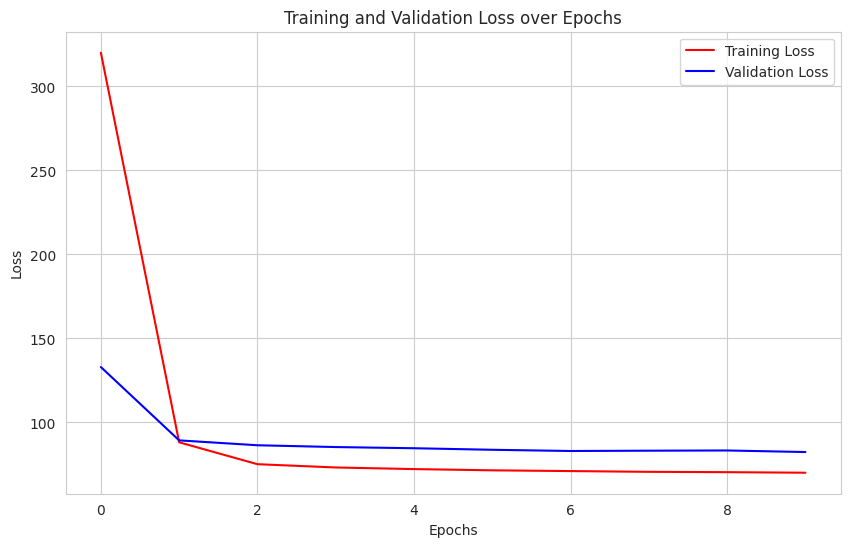

In [148]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_losses, label='Training Loss', color='red')
plt.plot(range(epochs), val_losses, label='Validation Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [161]:
torch.save(model.state_dict(), 'model.pth')

In [155]:
from sklearn.metrics import r2_score
# Test the model after training
model.eval()  # Set model to evaluation mode
y_true = []
y_pred = []

with torch.no_grad():
    for test_inputs, test_target in test_dataloader:
        test_features = test_inputs.flatten(start_dim=1)
        test_predictions = model(test_features)
        y_true.append(test_target)
        y_pred.append(test_predictions.squeeze())

# Convert lists to tensors for evaluation
y_true = torch.cat(y_true, dim=0)
y_pred = torch.cat(y_pred, dim=0)
y_true_numpy = y_true.numpy()
y_pred_numpy = y_pred.numpy()
# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_true_numpy, y_pred_numpy)
r2 = r2_score(y_true_numpy, y_pred_numpy)
print(f"Test MSE: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Test MSE: 75.9956
R-squared: 0.9013


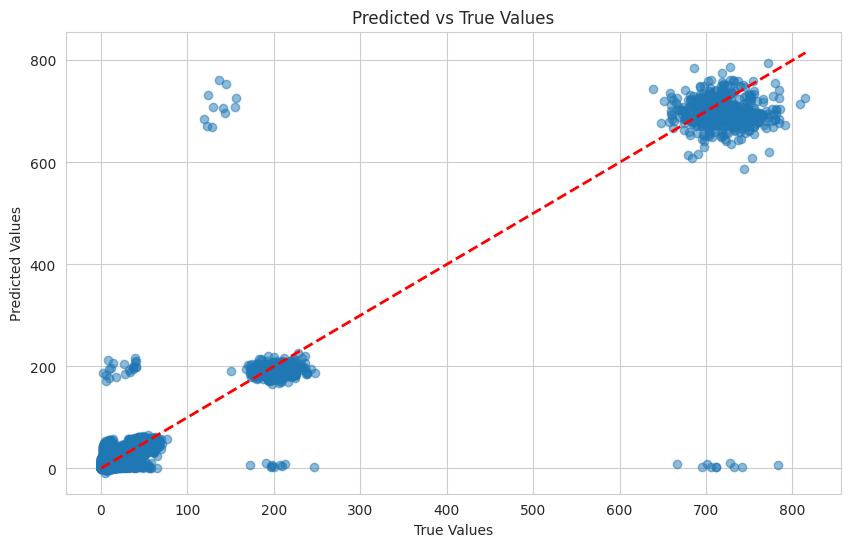

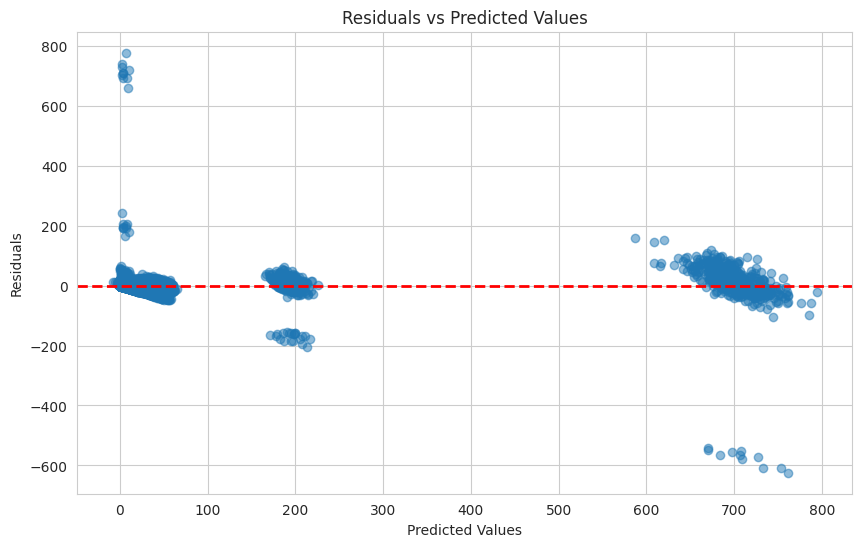

In [150]:
# Plotting predicted vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_true.numpy(), y_pred.numpy(), alpha=0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values')
plt.show()

# Plotting residuals (errors)
residuals = y_true - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred.numpy(), residuals.numpy(), alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plotting Mean Squared Error over epochs (if you have epoch-wise MSEs)
# Assuming `epoch_mse` is a list or array holding MSE values for each epoch
# epoch_mse = [value for each epoch]

# plt.figure(figsize=(10, 6))
# plt.plot(range(epochs), epoch_mse, label='MSE')
# plt.xlabel('Epochs')
# plt.ylabel('Mean Squared Error')
# plt.title('Training MSE Over Epochs')
# plt.legend()
# plt.show()

In [151]:
y_true.shape
y_true[0]

tensor([25., 19.,  4.])

NameError: name 'y_true' is not defined

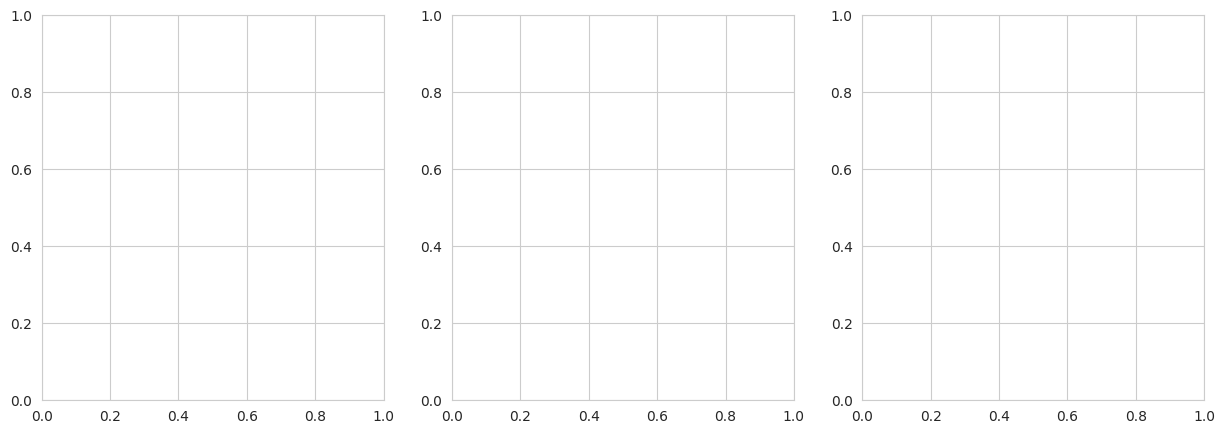

In [2]:
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are tensors of shape [batch_size, 3]
# The first feature is for play, the second for like, and the third for skip.

# Create a 1x3 grid for subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first feature (play) on the first subplot
axs[0].plot(y_true[:, 0].numpy(), label='True Values (Play)', color='red', marker='o', markersize=3, linestyle='-', alpha=0.3)
axs[0].plot(y_pred[:, 0].numpy(), label='Predicted Values (Play)', color='blue', marker='x', markersize=3, linestyle='-', alpha=0.3)
axs[0].set_title('Predicted vs True Values for Play')
axs[0].set_xlabel('Sample Index')
axs[0].set_ylabel('Play')
axs[0].legend()

# Plot the second feature (like) on the second subplot
axs[1].plot(y_true[:, 1].numpy(), label='True Values (Like)', color='red', marker='o', markersize=3, linestyle='-', alpha=0.3)
axs[1].plot(y_pred[:, 1].numpy(), label='Predicted Values (Like)', color='blue', marker='x', markersize=3, linestyle='-', alpha=0.3)
axs[1].set_title('Predicted vs True Values for Like')
axs[1].set_xlabel('Sample Index')
axs[1].set_ylabel('Like')
axs[1].legend()

# Plot the third feature (skip) on the third subplot
axs[2].plot(y_true[:, 2].numpy(), label='True Values (Skip)', color='red', marker='o', markersize=3, linestyle='-', alpha=0.3)
axs[2].plot(y_pred[:, 2].numpy(), label='Predicted Values (Skip)', color='blue', marker='x', markersize=3, linestyle='-', alpha=0.3)
axs[2].set_title('Predicted vs True Values for Skip')
axs[2].set_xlabel('Sample Index')
axs[2].set_ylabel('Skip')
axs[2].legend()

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# Mikroserwis

In [2]:
!pip install fastapi uvicorn flask

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)


In [3]:
sys.path.append('/Users/pkutyl/IUM/venv/lib/python3.11/site-packages')

In [4]:
from flask import Flask, request, jsonify
import logging
# Initialize Flask app
app = Flask(__name__)

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

@app.route('/log_action', methods=['POST'])
def log_action():
    try:
        # Get track_id and action from JSON body
        data = request.get_json()

        # Extract track_id and action, and log the current action
        track_id = data.get('track_id')
        action = data.get('action')

        # Validate input
        if not track_id or not action:
            return jsonify({'error': 'track_id and action are required'}), 400

        # Log the action
        logger.info(f"Track ID: {track_id}, Action: {action}")

        # Respond back with success
        return jsonify({
            'message': 'Action logged successfully',
            'track_id': track_id,
            'action': action
        })

    except Exception as e:
        # Log any exceptions that occur
        logger.error(f"Error processing request: {e}")
        return jsonify({'error': 'An error occurred'}), 500

if __name__ == '__main__':
    app.run(debug=True)

ModuleNotFoundError: No module named 'flask'

In [21]:
for i in range(10):
    print(i)


0
1
2
3
4
5
6
7
8
9


In [1]:
!pip install selenium

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)


In [2]:
import selenium

ModuleNotFoundError: No module named 'selenium'